<a href="https://colab.research.google.com/github/Ankitkragrl18/assignment1/blob/main/Copy_of_HEALTH_SURVEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('Train_Data.csv')

In [ ]:
df['PAQ605'].unique()

array([ 2.,  1., nan,  7.])

In [ ]:
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
df['age_group'].value_counts()

,count
age_group,
Adult,1638
Senior,314


In [ ]:
df.shape

(1966, 9)

<Axes: ylabel='LBXGLU'>

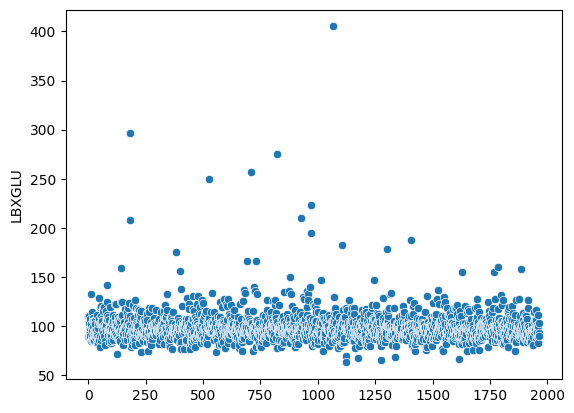

In [ ]:
sns.scatterplot(df['LBXGLU'])

<Axes: ylabel='LBXIN'>

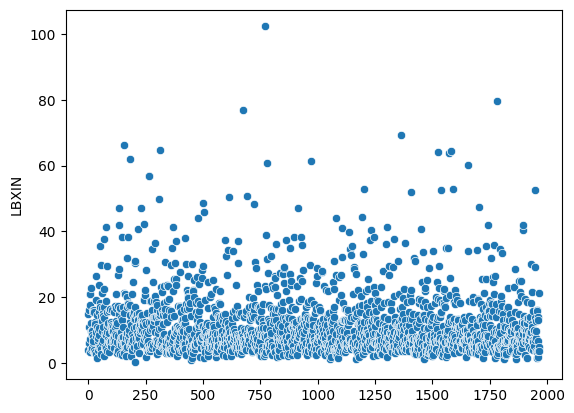

In [ ]:
sns.scatterplot(df['LBXIN'])

<Axes: ylabel='LBXGLT'>

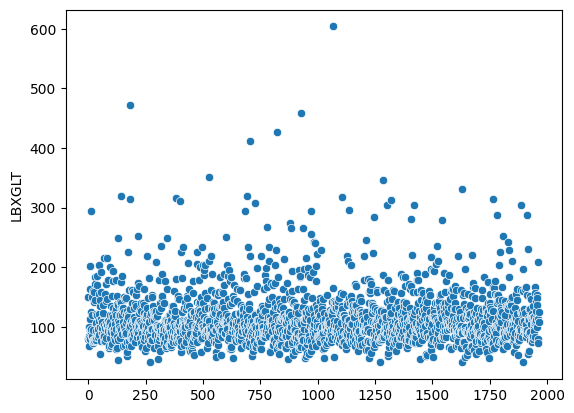

In [ ]:
sns.scatterplot(df['LBXGLT'])

<Axes: xlabel='LBXIN', ylabel='Density'>

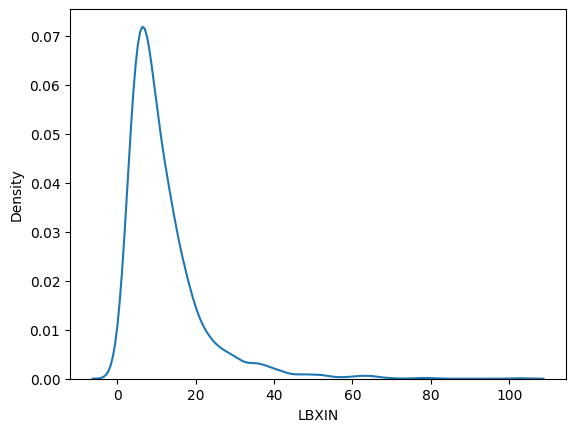

In [ ]:
sns.kdeplot(df['LBXIN'])

<Axes: xlabel='LBXGLU', ylabel='Density'>

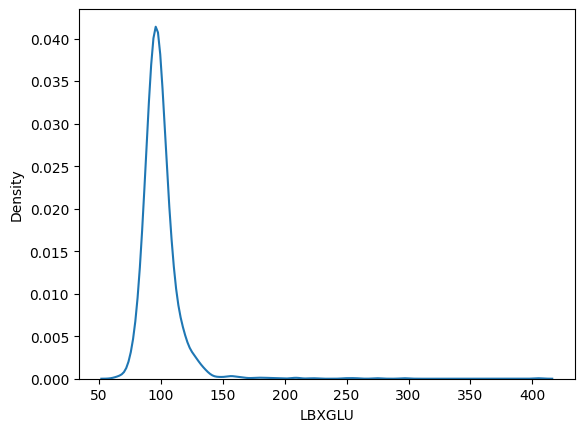

In [ ]:
sns.kdeplot(df['LBXGLU'])

<Axes: xlabel='LBXGLT', ylabel='Density'>

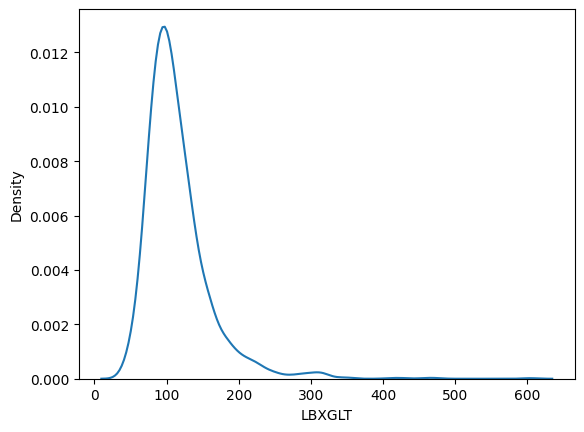

In [ ]:
sns.kdeplot(df['LBXGLT'])

In [ ]:
def is_LBXGLT(row):
    return row['LBXGLT'] >

mask = df.apply(is_LBXGLT, axis=1)
df = df[~mask]

df['LBXGLT'].max()


296.0

In [ ]:
df.shape

(1946, 9)

In [ ]:
def is_LBXGLU(row):
    return row['LBXGLU'] > 175

mask = df.apply(is_LBXGLU, axis=1)
df = df[~mask]

df['LBXGLU'].max()


166.0

In [ ]:
def is_LBXIN(row):
    return row['LBXIN'] > 55

mask = df.apply(is_LBXIN, axis=1)
df = df[~mask]

df.shape

(1929, 9)

In [ ]:
df.shape

(1929, 9)

In [ ]:
df

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [ ]:
X=df.iloc[:,[1,2,3,4,5,6,7]]
y=df.iloc[:,-1]

yh=SimpleImputer(strategy='most_frequent')
yh.fit(y.values.reshape(-1, 1))
yhandle=yh.transform(y.values.reshape(-1, 1))
y1=pd.DataFrame(yhandle,columns=['age_group'])
y1['age_group'] = y1['age_group'].replace({'Adult': 0, 'Senior': 1})
y1

/tmp/ipython-input-22-1478025990.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y1['age_group'] = y1['age_group'].replace({'Adult': 0, 'Senior': 1})


,age_group
0,0
1,0
2,0
3,0
4,0
...,...
1924,0
1925,0
1926,0
1927,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.2,random_state=42)
X_train.shape

(1543, 7)

In [ ]:
trf1=ColumnTransformer([
    ('impute_gender',SimpleImputer(strategy='most_frequent'),[0]),
    ('PAQ605',SimpleImputer(strategy='most_frequent'),[1]),
    ('BMXBMI',SimpleImputer(),[2]),
    ('LBXGLU',SimpleImputer(),[3]),
    ('DIQ010',SimpleImputer(strategy='most_frequent'),[4]),
    ('LBXGLT',SimpleImputer(),[5]),
    ('LBXIN',SimpleImputer(),[6])
],remainder='passthrough')

In [ ]:
trf2=ColumnTransformer([
    ('scaling',StandardScaler(),[2, 3, 5, 6]) #slice(0,10) means from 0 to 9 columns due ohe columns increases
],remainder='passthrough')


In [ ]:
trf3=DecisionTreeClassifier()

In [ ]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_gender',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('PAQ605',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('BMXBMI', SimpleImputer(),
                                                  [2]),
                                                 ('LBXGLU', SimpleImputer(),
                                                  [3]),
                                                 ('DIQ010',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('LBXGLT', SimpleImputer(),
                                                  [5]),
                                                 ('LBXIN', SimpleImputer(),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [2, 3, 5, 6])])),
                ('trf3', DecisionTreeClassifier())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
y_pred_new=pd.DataFrame(y_pred,columns=['age_group'])
y_pred_new.isnull().sum()

,0
age_group,0


In [ ]:
y_pred_new

,age_group
0,0
1,0
2,0
3,0
4,0
...,...
381,0
382,0
383,0
384,0


In [ ]:
y_test

,age_group
1118,0
1653,0
1864,0
941,0
331,1
...,...
567,0
720,0
1132,0
979,0


In [ ]:
accuracy_score(y_test,y_pred_new)

0.7512953367875648

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()


np.float64(0.757004160887656)

In [ ]:
#gridsearchcv
param={
    'trf3__max_depth':[1,2,3,None]
}
#ye generally predicting value ka accuracy badha deta ya ghata deta

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,param,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_gender',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('PAQ605',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [1]),
                                                                        ('BMXBMI',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('LBXGLU',
                                                                         SimpleImputer(),
                                                                         [3]),
                                                                        ('DIQ010',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [4]),
                                                                        ('LBXGLT',
                                                                         SimpleImputer(),
                                                                         [5]),
                                                                        ('LBXIN',
                                                                         SimpleImputer(),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         [2, 3,
                                                                          5,
                                                                          6])])),
                                       ('trf3', DecisionTreeClassifier())]),
             param_grid={'trf3__max_depth': [1, 2, 3, None]},
             scoring='accuracy')

In [ ]:
grid.best_score_

np.float64(0.8425219941348974)